
TFG

Este es el codigo del tfg de Borja Jimeno

En esta primera celda vamos a definir todas las funciones y variables que necesitaremos para calcular el ritmo teórico. Cada función está explicada al inicio y cada variable tiene asociadas sus unidades en un comentario a la derecha.  

Para la realización de las funciones se ha tomado como referencia:  
-El pdf ('rateTutorial_MMartinez_TAE25.pdf)    
-El capítulo 7 de la Tesis de María ('tesisMaria_chap7.pdf')   
-El artículo 'Inelastic and Elastic Scattering of 187-Mev Electrons from Selected Even-Even Nuclei - Richard Helm - PHISICAL REVIEW VOLUME 104, NUMBER 5 DECEMBER 1, 1956'  
-Para calcular el Quenching Factor, Sección 4.3.2 de la tesis de Tamara Pardo Yanguas ('Tesis-Tamara.pdf')



En este codigo vamos a calcular el ritmo diferencial de interaccion de un WIMP en el detector. Sabemos que el ritmo esperado en el detector debe ser proporcional al numero de nuclos blanco ($N_T$), a la densidad numerica de WIMPs ($n_\chi$), al promedio de la velcidad relativa entre el WIMP y el detector ($\langle v \rangle$) y a la seccion eficaz ($\sigma$):

$$R\approx N_T \times n_{\chi} \times \langle v \rangle \times \sigma = \frac{M_{det}}{m_N} \times \frac{\rho_{\chi}}{m_{\chi}}  \times \int_0^\infty vf(v)d^3v \times \sigma \phantom{asd} \left[cts\cdot s^{-1}\right]$$

Donde:

$M_{det}$ es la masa del detector.\
$m_{N}$ es la masa nuclear.\
$\rho_{\chi}$ es la densidad de WIMPs.\
$m_{\chi}$ es la masa del WIMP.

De esta expresion, se puede obtener el ritmo diferencial por unidad de energia de retroceso:
$$\frac{dR}{dE_R}=\frac{M_{det}}{m_N}\frac{\rho_{\chi}}{m_{\chi}}\int^{\infty}_{0}vf(v)\frac{d\sigma}{dE_R}(v,E_R)d^3v \phantom{asd} $$

Asumiremos ciertas condiciones que nos ayudan a simplificar esta ultima formula:

Dado que los detectores tienen un umbral de energia $E_R$, existe una velocidad minima de los WIMPS que interactuan con los detectores, por lo que el limite inferior de la integral ya no es $0$ si no que es $v_{min}=\sqrt{\frac{E_R m_N}{2\mu^2_{\chi N}}}$.En la expresion, $\mu^2_{\chi N}=\frac{m_N m_{\chi}}{m_N + m_{\chi}}$ es la masa reducida del sistema nucleo-WIMP, con $m_N$ la masa del nucleo.

En cuanto a la velocidad maxima, se toma la velocidad de escape de la galxia $v_{esc}$

Desarrollando la expresion de la seccion eficaz diferencial, se puede expresar como el producto de la seccion eficaz puntual por un factor de forma nuclear. Si ademas asumimos que la interaccion es Spin Independent, llegamos a la sigueinte expresion:

$$\frac{d\sigma}{dE_R}(v,E_r)=\frac{d\sigma}{dE_R}(v,0)F^2(q)=\frac{m_N}{2\mu^2_{\chi N}v^2}\frac{m_N A^2 \mu^2_{\chi N}}{\mu^2_{\chi n}}\sigma_{SI}F^2(q)=\frac{m_N A^2 \sigma_{SI} F^2(q)}{2 v^2 \mu^2_{\chi n}}$$

Por lo que la integral del promedio de la velocidad queda:

$$\int^{\infty}_{0}vf(v)\frac{d\sigma}{dE_R}(v,E_R)d^3v=\frac{m_N A^2 \sigma_{SI} F^2(q)}{2 \mu^2_{\chi n}}\int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v^2}d^3v=\frac{m_N A^2 \sigma_{SI} F^2(q)}{2 \mu^2_{\chi n}} \eta (v_{min},t)$$

Trabajaremos con el modelo de halo estandar (SHM), por lo que la integral dada por $\eta (v_{min},t)$ es analitica. (Se vera mas adelante)

Con todo esto llegamos a la Master Formula:

## $$\frac{dR}{dE_R}=\frac{M_{det} \rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v$$





In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18

unitsvearth = 0 # km/s -> 0 , m/s -> 1

#ctes

mn=0.9315               # Masa nucleon (GeV/c^2)
NA=6.022e23             # Numero de Avogadro
c=299792458             # Velocidad luz (m/)s
hbar = 6.582e-16        # eV*s
sqrtpi=m.sqrt(m.pi)     # Raíz de pi

#Halo DM
rho=0.3                 # Densidad local de materia oscura Gev/c2/cm3
vesc=544                # Velocidad de escape de la galaxia (km/s)

#Velocidad del sol
u1=np.array([ 0.9941, 0.1088, 0.0042])
u2=np.array([-0.0504, 0.4946, -0.8677])
v0=np.array([0,238,0])                      # Velocidad en reposo local standar (km/s)
v0n=np.sqrt(v0.dot(v0))                     # Norma de la Velocidad en reposo local standar (km/s)
omega=0.0172                                # Frecuencia angular en d-1 (2pi/365)
vpec=np.array([11.1,12.2,7.3])              # Velocidad peculiar (km/s)
vsun=v0+vpec                                # Velocidad del Sol (km/s)
vorb=29.8                                   # Velocidad orbital de la Tierra (km/s)
timeMax=72.9                                # Dia de la máxima velocidad de la tierra: 2 de junio, empezando desde el 22 de marzo.
timeMin=255.5                               # Dia de la mínima velocidad de la tierra: empezando desde el 22 de marzo.
timeAvg=(timeMax+timeMin)/2.                # Dia promedio (El que usaremos para calcular el ritmo)
ene=np.arange(0,100,1)                      # Array de energías de 0 a 100 MeV en intervalos de 1 MeV
time=np.arange(0,365,1)                     # Array de dias, 365 dias en intervalos de 1 dia




#################
# Funcion de Bessel de primera especie
#################
def j1(x):
    return(m.sin(x)/(x*x)-m.cos(x)/x)

#################
# Velocidad de la tierra, en km/s
#################
def vearth(t): 
    v = vsun + vorb*(m.cos(omega*t)*u1+m.sin(omega*t)*u2)
    return m.sqrt(v.dot(v))
    
#################
# Velocidad minima de la DM para un umbral E (en km/s)
# E en keV
# A: Numero másico
# mW: Masa del Wimp en GeV/c^2
#################
def vmin(E,A,mW): 
    res=E*1e-6*(A*mn+mW)*(A*mn+mW)/(2*A*mn*mW*mW)
    res=np.sqrt(res)*c/1000
    return res

#################
# mean inverse speed function (Función de velocidad inversa media) (en s/km)
# E en keV
# t: Tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
#################
def eta(E,t,A,mW):
    x=vmin(E,A,mW)/v0n
    y=vearth(t)/v0n
    z=vesc/v0n
    if(x>(z+y)): 
        return 0
    else:
        N=m.erf(z)-2*z/np.sqrt(np.pi)*m.exp(-z*z)
        if((x>(z-y)) and ((z+y) >= x)):
            return 1/(2*y*v0n*N)*(m.erf(z)-m.erf(x-y)-2/np.sqrt(np.pi)*(z+y-x)*np.exp(-z*z))
        if((x>=(0)) and ((z-y) >= x)):
            return 1/(2*y*v0n*N)*(m.erf(x+y)-m.erf(x-y)-4/np.sqrt(np.pi)*y*np.exp(-z*z))
        
#################
# Factor de Forma
# E en keV
# A: Numero másico
#################
def FF(E,A):
    if E==0:
        E=1e-12
    s=1
    R=1.2*A**(0.3333)
    
    R1=m.sqrt(R*R-5*s*s)
    R1*=1e-6/hbar/c

    q2=2*E*A*mn*1e-6
    x=m.sqrt(q2)*R1
    aux=q2*s*s*1e-6/hbar/c*1e-6/hbar/c
    F2=((3*j1(x)/(x))**2)*m.exp(-aux)
    return F2

#################
# Ritmo diferencial
# E en keV
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
#################
def rate(E,t,A,mW,sigmaSI):
    mN=A*mn
    Mdet=NA*mN*1000 # GeV/c2/kg
    mu_n=mW*mn/(mW+mn)
    retval=Mdet*rho/2./mW*A*A/mu_n/mu_n*sigmaSI*c*c
    retval*=8.64e-3 # to convert to counts/kg/keV/d
    retval*=365 # convert to counts/kg/keV/y
    retval*=FF(E,A)
    retval*=eta(E,t,A,mW)
    return retval

#########################
#########################
# Ritmo total, integrado entre Ei y Ef (en c/kg/y)
# Ei, Ef: Energias inicial y final en keV
# t: tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
def totalRate(Ei,Ef,t,A,mW,sigmaSI):
  ene=np.arange(Ei,Ef,0.1)
  rates=np.array([rate(e,t,A,mW,sigmaSI) for e in ene])
  return rates.sum()*0.1

#########################
#########################
# Ritmo en funcon del tiempo
# Ei, Ef: Energias inicial y final en keV
# t: tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
def ratevsTime(Ei,Ef,A,mW,sigmaSI):
    dias = np.arange(0,365)
    ritmos_dias=([totalRate(Ei,Ef,t,A,mW,sigmaSI) for t in dias])
    return ritmos_dias



# FUNCIONES ESPECIFICAS PARA NAI

#########################
#########################
# Ritmo en funcon del tiempo
# Ei, Ef: Energias inicial y final en keV
# t: tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
def ratevsTimeNaI(Ei,Ef,mW,sigmaSI):
    dias = np.arange(0,365)
    ritmos_dias=([totalRateNaI(Ei,Ef,t,mW,sigmaSI) for t in dias])
    return ritmos_dias
       
#########################
#########################
# Ritmo total, integrado entre Ei y Ef (en c/kg/y)
# Ei, Ef: Energias inicial y final en keV
# t: tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
def totalRateNaI(Ei,Ef,t,mW,sigmaSI):
  ene=np.arange(Ei,Ef,0.1)
  rates=np.array([RateNaI(e,t,mW,sigmaSI) for e in ene])
  return rates.sum()*0.1

#########################
#########################
# Ritmo diferencial
# E en keV
# t: tiempo en dias desde el 22 de marzo
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
def RateNaI(E,t,mW,sigmaSI):
    ratesNa=rate(E,t,23,mW,sigmaSI)
    ratesI=rate(E,t,127,mW,sigmaSI)
    return (23.*ratesNa+127.*ratesI)/(23.+127.)


# FUNCIONES TENIENDO EN CUENTA EL FACTOR QUENCHING

#FACTOR QUENCHING
#   Devuelve el factor quenching del NaI evaluado en electron-equivalent energy ee
#   Parametros
# ee : float o array-like de Electron-equivalent energy.
# Devuelve: float or np.ndarray
# Quenching factor QF(ee), interpolado linealmente en (x=ER*QF, y=QF)
# Construido para ER in [1, 100] with N=200 points.
# From modified Lindhard Fit of Na QF data (Tamara's thesis)
# k = 0.072, alpha = 0.007
# epsilon = alpha * ER
# g(ER)=3*pow(epsilon, 0.15) + 0.7*pow(epsilon,0.6) + epsilon
# QF(ER)=k*g(ER)/(1+k*g(ER))
# Eee=ER*QF(ER)

def getQFNa(ee, k=0.072, alpha=0.007, N=200, ER_min=1.0, ER_max=100.0):
    # calculate QF(ER) for interval ER_min, ER_max
    ER = np.linspace(ER_min, ER_max, N)
    epsilon = alpha * ER
    g = 3.0 * epsilon**0.15 + 0.7 * epsilon**0.6 + epsilon
    qf = (k * g) / (1.0 + k * g)

    # Graph: x = ER * qf (== ee), y = qf
    x = ER * qf
    y = qf

    # Interpolate y at the provided ee values.
    # For values outside the tabulated range, clamp to the nearest endpoint
    ee_arr = np.atleast_1d(ee).astype(float)
    y_interp = np.interp(ee_arr, x, y, left=y[0], right=y[-1])

    return y_interp[0] if np.isscalar(ee) else y_interp

def getQFI(ee, p0=0.03, p1=0.0006, limit=80.0, N=200, ER_min=1.0, ER_max=100.0):
    # calculate QF(ER) for interval ER_min, ER_max
    ER = np.linspace(ER_min, ER_max, N)

    # Piecewise-linear QF(ER)
    qf = p0 + p1 * np.minimum(ER, limit)

    # Graph x = ER * QF(ER), y = QF(ER)
    x = ER * qf
    y = qf

    # Interpolate y at ee; clamp outside domain to the nearest endpoint
    ee_arr = np.atleast_1d(ee).astype(float)
    y_interp = np.interp(ee_arr, x, y, left=y[0], right=y[-1])

    return y_interp[0] if np.isscalar(ee) else y_interp

#################
# Ritmo diferencial (Teniendo en cuenta el Quenching, Energía en ee)
# E en keV
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
#################
def rate_ee(Eee,t,A,mW,sigmaSI,Q=1):
    E=Eee/Q
    mN=A*mn
    Mdet=NA*mN*1000 # GeV/c2/kg
    mu_n=mW*mn/(mW+mn)
    retval=Mdet*rho/2./mW*A*A/mu_n/mu_n*sigmaSI*c*c
    retval*=8.64e-3 # to convert to counts/kg/keV/d
    retval*=365 # convert to counts/kg/keV/y
    retval*=FF(E,A)
    retval*=eta(E,t,A,mW)
    retval/=Q
    return retval

#########################
#########################
# Ritmo diferencial en detector NaI (en c/kevee/kg/y) 
# E: en keVee
# t: tiempo en dias desde el 22 de marzo
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
# QNa es el factor de Quenching a energía Eee(keVee) para Na
# QI es el factor de Quenching a energía Eee(keVee) para I
def rateNaI_ee(Eee,t,mW,sigmaSI, QNa=1, QI=1):
  # convert Eee to keV_NR
  rateNa = rate_ee(Eee,t,23,mW,sigmaSI,QNa)
  rateI = rate_ee(Eee,t,127,mW,sigmaSI,QI)
 
  return (rateNa*23.+rateI*127.)/(23.+127.)

#########################
#########################
# Ritmo total, integrado entre Eiee y Efee (en c/kg/y)
# Eiee, Efee: Energías inicial y final en keVee
# t: tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
def totalRate_NaI_ee(Eiee,Efee,t,mW,sigmaSI):
  energy_ee = np.arange(Eiee,Efee,0.1)
  qfNa = getQFNa(energy_ee)
  qfI = getQFI(energy_ee)
  rates = np.array([
        rateNaI_ee(e, t, mW, sigmaSI, qna, qi)
        for e, qna, qi in zip(energy_ee, qfNa, qfI)
    ])

  return rates.sum()*0.1


### Unidades de la integral:
$$\frac{dR}{dE_R}=\frac{M_{det} \rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v$$

$$M_{det} \phantom{d} \left[GeV\cdot c^{-2}\right] \phantom{asda} \rho_{\chi} \phantom{d} \left[GeV\cdot c^{-2} \cdot cm^-3\right] \phantom{asda} M_{\chi} \phantom{d} \left[GeV\cdot c^{-2}\right]$$

$$\mu^2_{\chi n} \phantom{d} \left[GeV\cdot c^{-2}\right]^2 \phantom{asda} \sigma_{SI} \phantom{d} \left[cm^2\right] \phantom{asda} \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v \phantom{d} \left[s\cdot km^{-1}\right]$$

$$F^2(q) \phantom{d} [\textup{Adimensional}] \phantom{asda} A^2 \phantom{d} [\textup{Adimensional}]$$




Calculamos las unidades de la expresion sin la integral:

$$\frac{M_{det} \rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \rightarrow \frac{\left[GeV\cdot c^{-2}\right]\left[GeV\cdot c^{-2} \cdot cm^{-3}\right]}{\left[GeV\cdot c^{-2}\right]\left[GeV\cdot c^{-2}\right]^2 }\cdot cm^2 \rightarrow \left[ c^2 \cdot GeV^{-1} \cdot cm^{-1}\right]$$

Sustituimos el valor de $c^2$ en  $ \left[ m\cdot s^{-1} \right]$

$$\left[ c^2 \cdot GeV^{-1} \cdot cm^{-1}\right] \rightarrow  \left(3\cdot 10^8\right)^2 \left[ m^2 \cdot s^{-2} \cdot GeV^{-1} \cdot cm^{-1}\right] \left[ 100 \cdot cm\cdot m^{-1}\right]\rightarrow 100\cdot\left(3\cdot 10^8\right)^2 \left[ m\cdot  s^{-2} \cdot GeV^{-1}\right] $$

Calculamos las unidades la expresion por completo, multiplicando lo anterior por las unidades de la integral:

$$\frac{M_{det} \rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v \rightarrow 100\cdot\left(3\cdot 10^8\right)^2 \left[ m\cdot  s^{-2} \cdot GeV^{-1}\right] \left[ s \cdot km^{-1}\right]\left[ 1000^{-1} \cdot km\cdot m^{-1}\right]$$
$$\boxed{\frac{dR}{dE_R} \rightarrow \frac{\left(3\cdot 10^8\right)^2}{10} \left[ GeV^{-1} s^{-1}\right] }$$

Hacemos el cambio de unidades de 

$M_{det} \phantom{d} \left[GeV\cdot c^{-2}\right]$\
$\rho_{\chi} \phantom{d} \left[GeV\cdot c^{-2} \cdot cm^-3\right]$\
$M_{\chi} \phantom{d} \left[GeV\cdot c^{-2}\right]$\
$\mu^2_{\chi n} \phantom{d} \left[GeV\cdot c^{-2}\right]^2$\
$\sigma_{SI} \phantom{d} \left[cm^2\right]$\
$\int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v \phantom{d} \left[s\cdot km^{-1}\right]$\
$F^2(q) \phantom{d} [\textup{Adimensional}]$\
$A^2 \phantom{d} [\textup{Adimensional}]$



In [ ]:
def rate(E,t,A,mW,sigmaSI):
    mN=A*mn                 # masa del nucleo (en funcion de la masa del nucleon) Gev/c^2
    Mdet=NA*mN*1000         # masa de 1 kg de detector GeV/c2/kg
    mu_n=mW*mn/(mW+mn)      # masa reducida del sistema nucleon-WIMP Gev/c^2
    retval=Mdet*rho/2./mW*A*A/mu_n/mu_n*sigmaSI
    retval*=Mdet*rho/2./mW*A*A/mu_n/mu_n*sigmaSI*c*c
    retval*=8.64e-3 # to convert to counts/kg/keV/d
    retval*=365 # convert to counts/kg/keV/y
    retval*=FF(E,A)
    retval*=eta(E,t,A,mW)
    return retval
Mdet=NA*mn*1000 # GeV/c2/kg


5.609493e+26


Dia 1
En este primer apartado sacamos graficas para familiarizarnos con las funciones definidas en la parte superior.
Calculamos el ritmo teórico diferencial para diferentes targets. En este caso para Na, I y NaI.

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
C:\Users\borja\AppData\Local\Temp\ipykernel_10156\3731206142.py:19: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(r'Diferentes Objetivos (Mw=' + str(np.round(mW)) + ' GeV/$c^2$ --- $\sigma_{SI}$=' + str(si) + ' $cm^2$)')


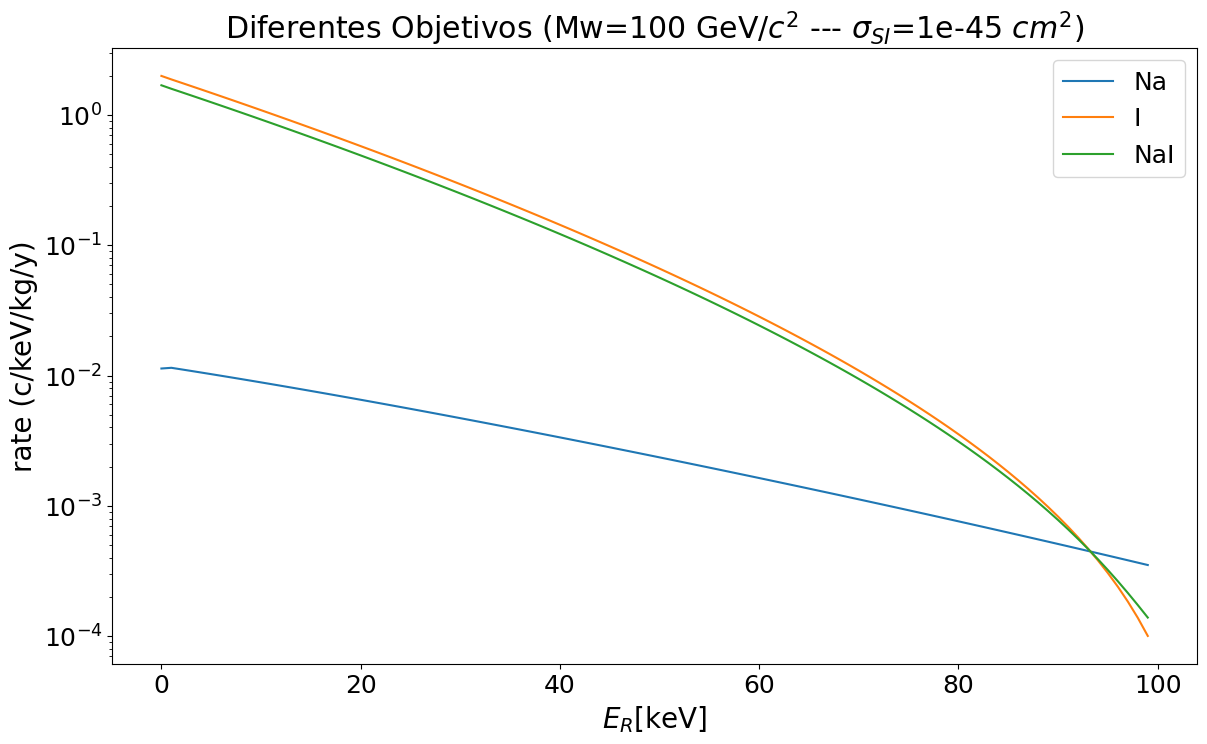

In [26]:

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW=100 #masa wimp (geV/c^2)
si=1e-45 #seccion eficaz SI(cm^-2)
ene=np.arange(0,100,1)


rateNa=np.array([rate(e,timeAvg,23,mW,si) for e in ene])
rateI=np.array([rate(e,timeAvg,127,mW,si) for e in ene])
rate_NaI=np.array([RateNaI(e,timeAvg,mW,si) for e in ene])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateNa, label = "Na")
ax.plot(ene,rateI, label = "I")
ax.plot(ene,rate_NaI, label = "NaI")
ax.set_title(r'Diferentes Objetivos (Mw=' + str(np.round(mW)) + ' GeV/$c^2$ --- $\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel(r'rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel(r'$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")

En esta segunda grafica hemos calculado el ritmo diferencial en funcion de diferentes masas del wimp para un objetivo de NaI

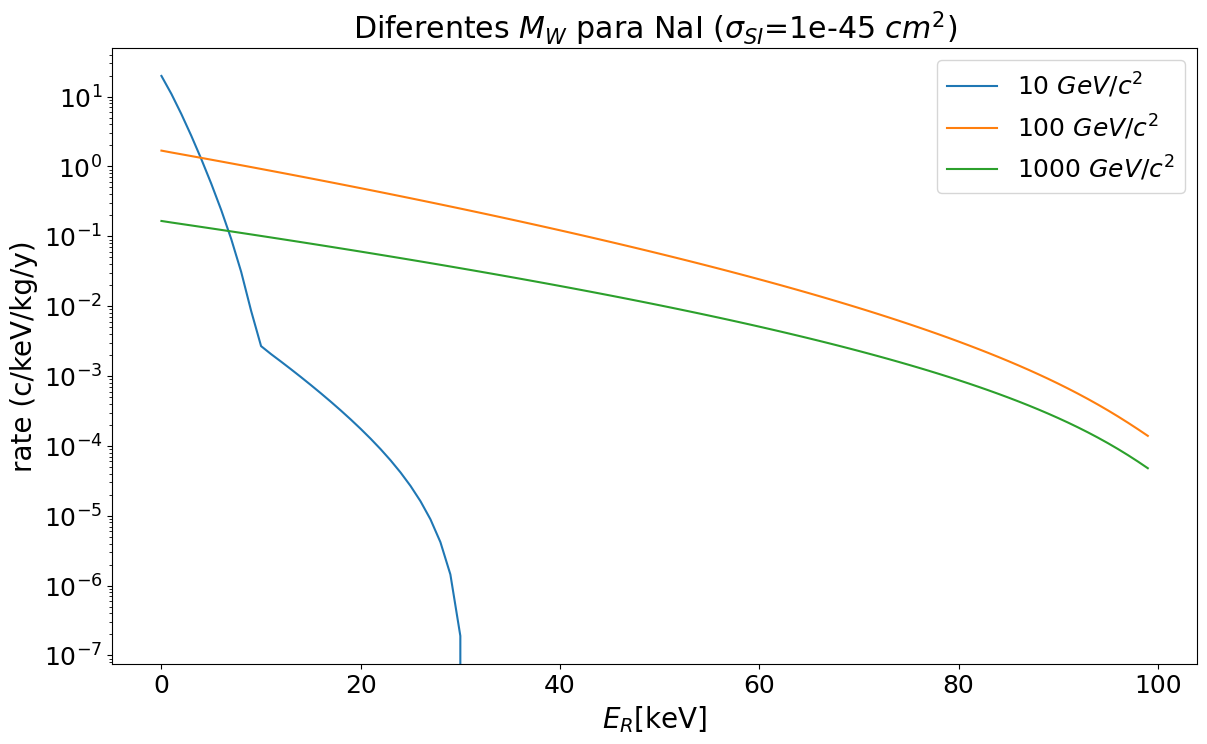

In [27]:

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.


si=1e-45 #seccion eficaz SI(cm^-2)
ene=np.arange(0,100,1)


rateAr10=np.array([RateNaI(e,timeAvg,10,si) for e in ene])
rateAr100=np.array([RateNaI(e,timeAvg,100,si) for e in ene])
rateAr1000=np.array([RateNaI(e,timeAvg,1000,si) for e in ene])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateAr10, label = "10 $GeV/c^2$")
ax.plot(ene,rateAr100, label = "100 $GeV/c^2$")
ax.plot(ene,rateAr1000, label = "1000 $GeV/c^2$")
ax.set_title(r'Diferentes $M_W$ para NaI ($\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel(r'rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel(r'$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")


En esta segunda grafica hemos calculado el ritmo diferencial para dos fechas diferentes par un objetivo de NaI

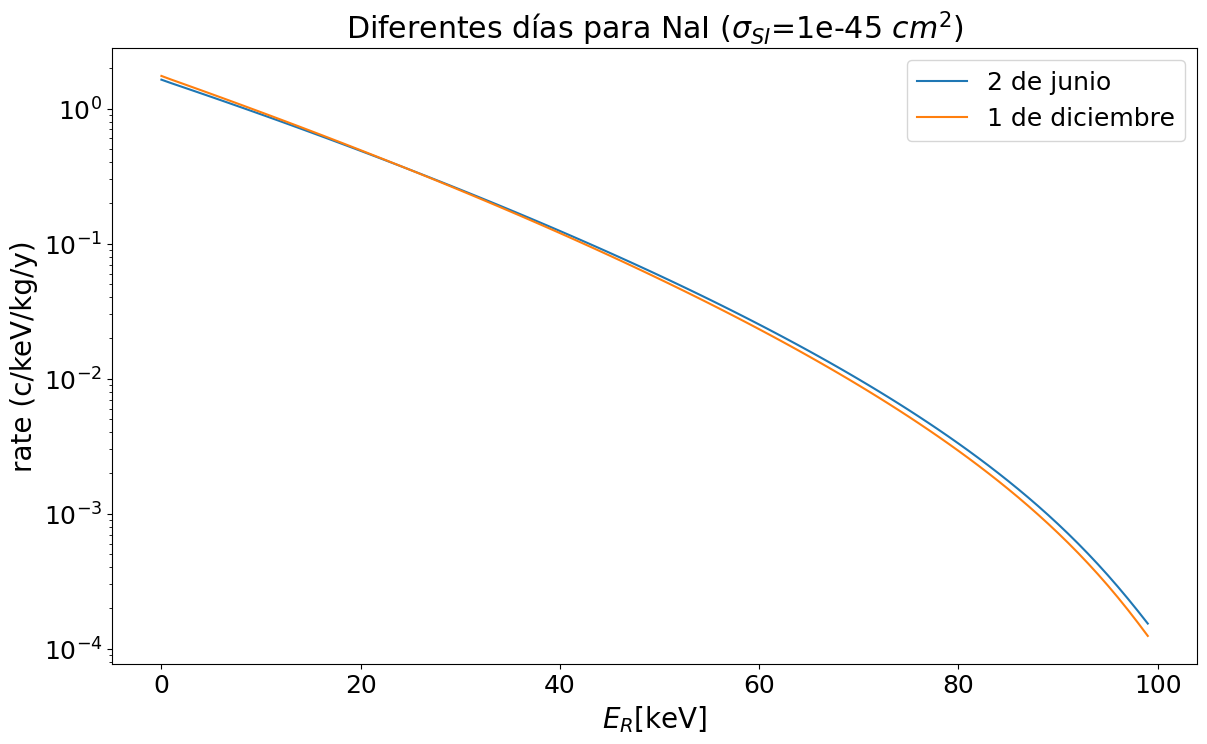

In [28]:

timeMax=72.9 
timeMin=255.5 

mW=100 #masa wimp (geV/c^2)
si=1e-45 #seccion eficaz SI(cm^-2)
ene=np.arange(0,100,1)


rateArtmax=np.array([RateNaI(e,timeMax,mW,si) for e in ene])
rateArtmin=np.array([RateNaI(e,timeMin,mW,si) for e in ene])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateArtmax, label = "2 de junio")
ax.plot(ene,rateArtmin, label = "1 de diciembre")

ax.set_title(r'Diferentes días para NaI ($\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel(r'rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel(r'$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")



En esta grafica hemos representado el ritmo esperado integrando en un intervalo de energías $E \in (0,60)$ $keV$, en funcion del día, se espera ver cierta modulación del ritmo.

R_max = 339053.0
R_min = 333924.0
R_0 = 336522.0
t_max = 256
Error = 0.00979


Text(0.5, 0, 'time (days since March 22)')

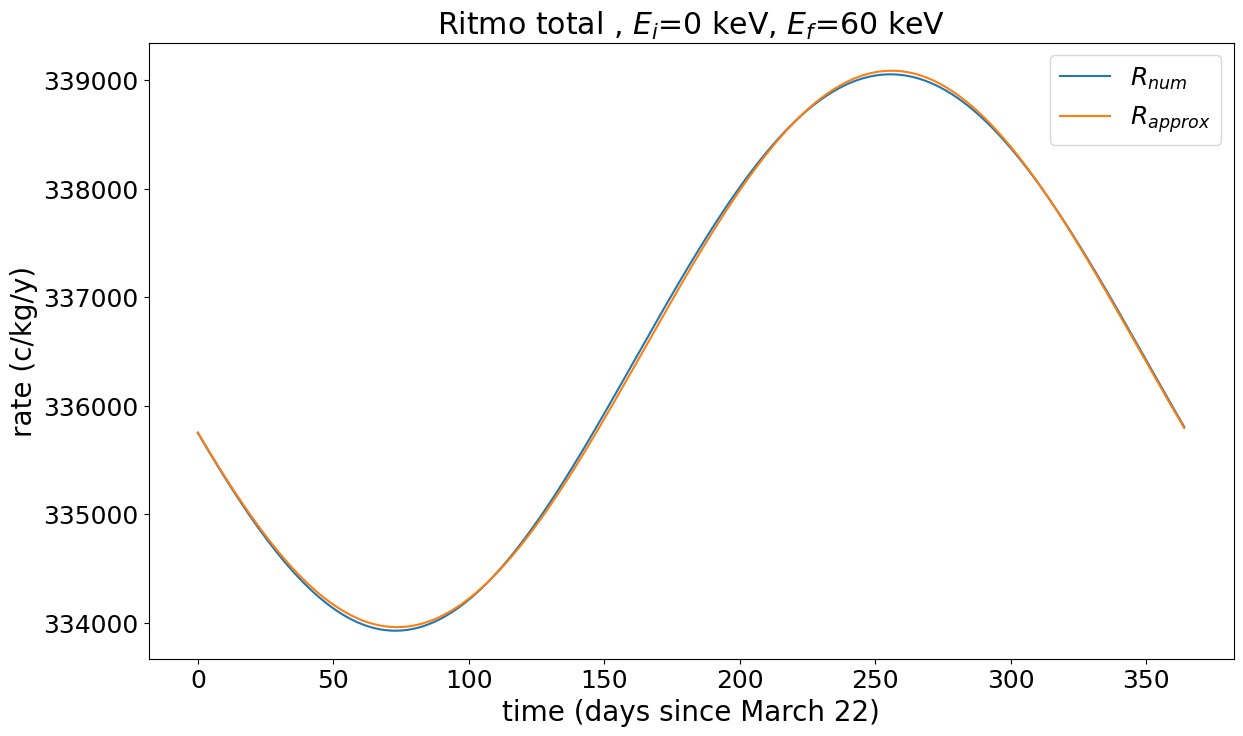

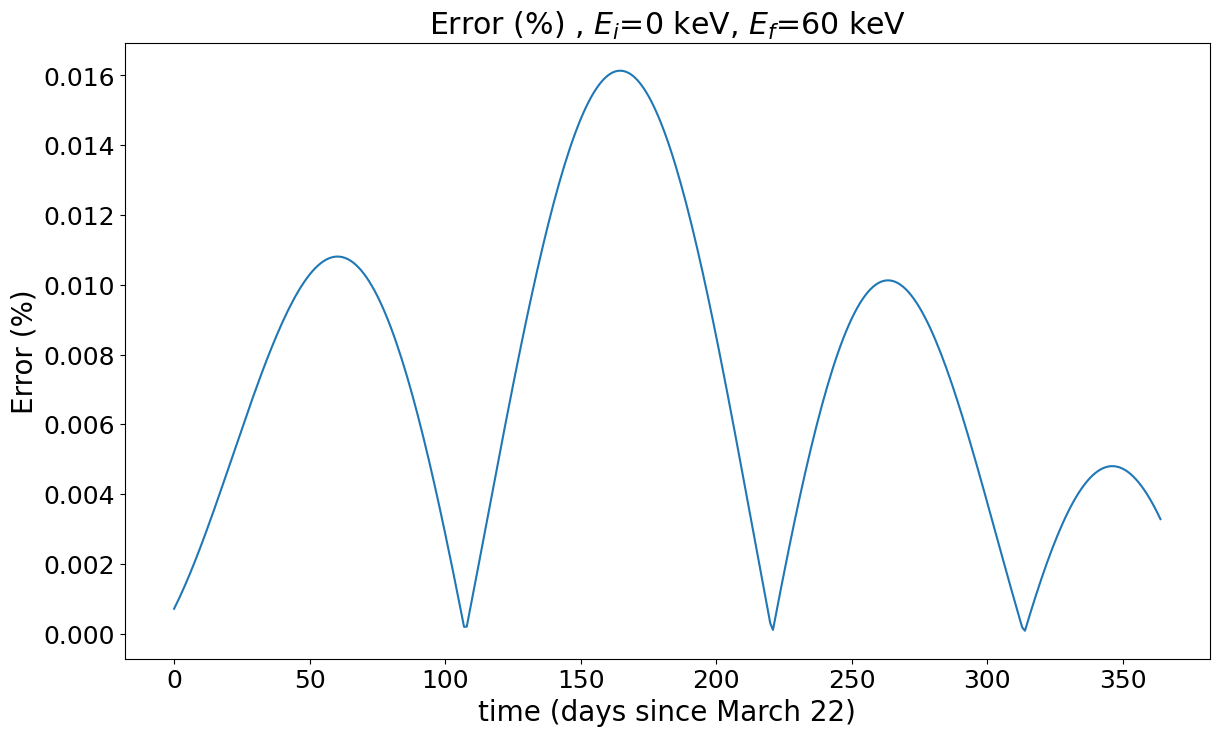

In [29]:

Ei=0
Ef=60

mW=70
si=1e-41 #seccion eficaz SI(cm^-2)
ritmosvstiempos=ratevsTimeNaI(Ei,Ef,mW,si)
R_max=np.max(ritmosvstiempos)
print('R_max = '+str(np.round(R_max)))
R_min=np.min(ritmosvstiempos)
print('R_min = '+str(np.round(R_min)))
R_0=np.mean(ritmosvstiempos)
print('R_0 = '+str(np.round(R_0)))
t_max=np.argmax(ritmosvstiempos)
print('t_max = '+str(t_max))

R_mod=0.5*(R_max-R_min)
omega=2*np.pi/365.

dias = np.arange(0,365)

rapprox=([(R_0+R_mod*np.cos(omega*(t-t_max))) for t in dias])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(dias,ritmosvstiempos, label = "$R_{num}$")
ax.plot(dias,rapprox, label = "$R_{approx}$")
ax.set_title('Ritmo total , $E_i$='+str(Ei)+' keV, $E_f$='+str(Ef)+' keV')
ax.set_ylabel('rate (c/kg/y)',fontsize=20)
ax.set_xlabel('time (days since March 22)',fontsize=20)
ax.legend()


err=([np.abs(((1-rapprox[t]/ritmosvstiempos[t]))*100) for t in dias])
print('Error = '+str(np.round(err[t_max],5)))

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(dias,err, label = "$R_{num}$")
ax.set_title('Error (%) , $E_i$='+str(Ei)+' keV, $E_f$='+str(Ef)+' keV')
ax.set_ylabel('Error (%)',fontsize=20)
ax.set_xlabel('time (days since March 22)',fontsize=20)
#ax.set_yscale("log")



En esta grafica hemos representado el ritmo esperado integrando en un intervalo de energías $E \in (10,60)$ $keV$, en funcion del día. Tambien se calcula una aproximación, en este caso se ve que el error de la aproximación es mayor si modificamos el intervalo de energías.

R_max = 161124.0
R_min = 158160.0
R_0 = 159716.0
t_max = 73
Error = 0.04539


Text(0.5, 0, 'time (days since March 22)')

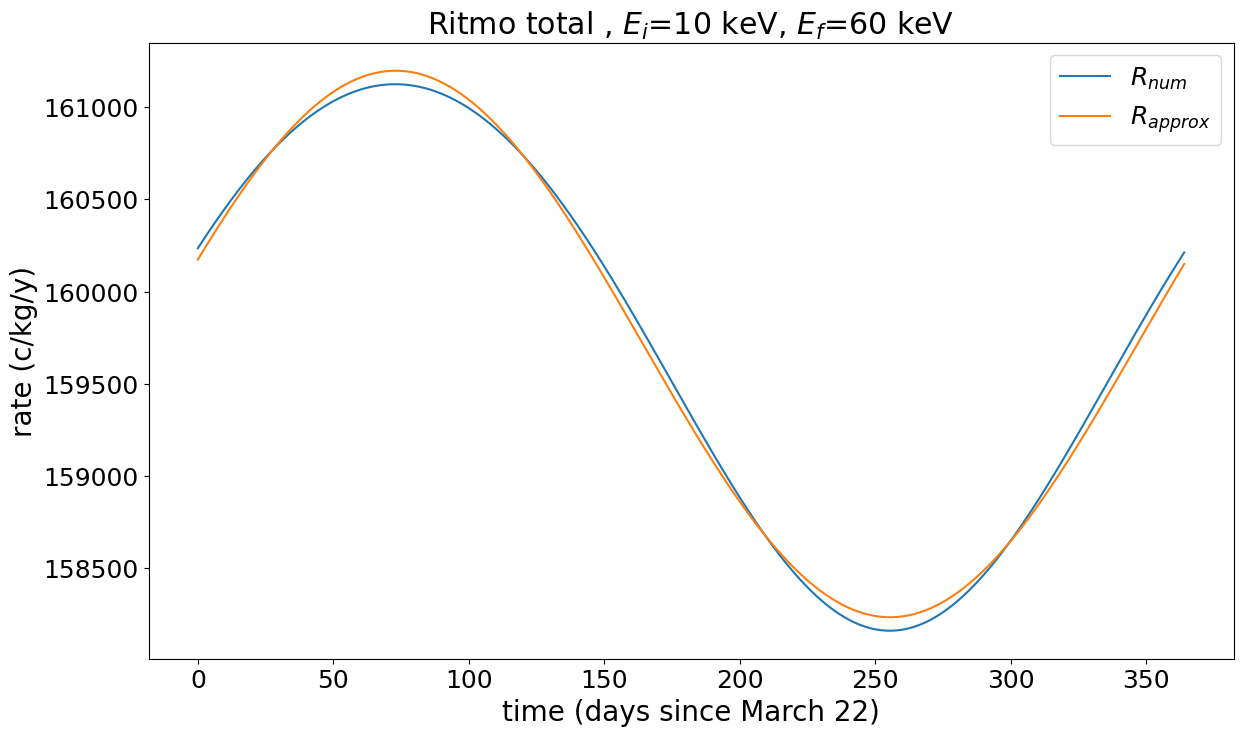

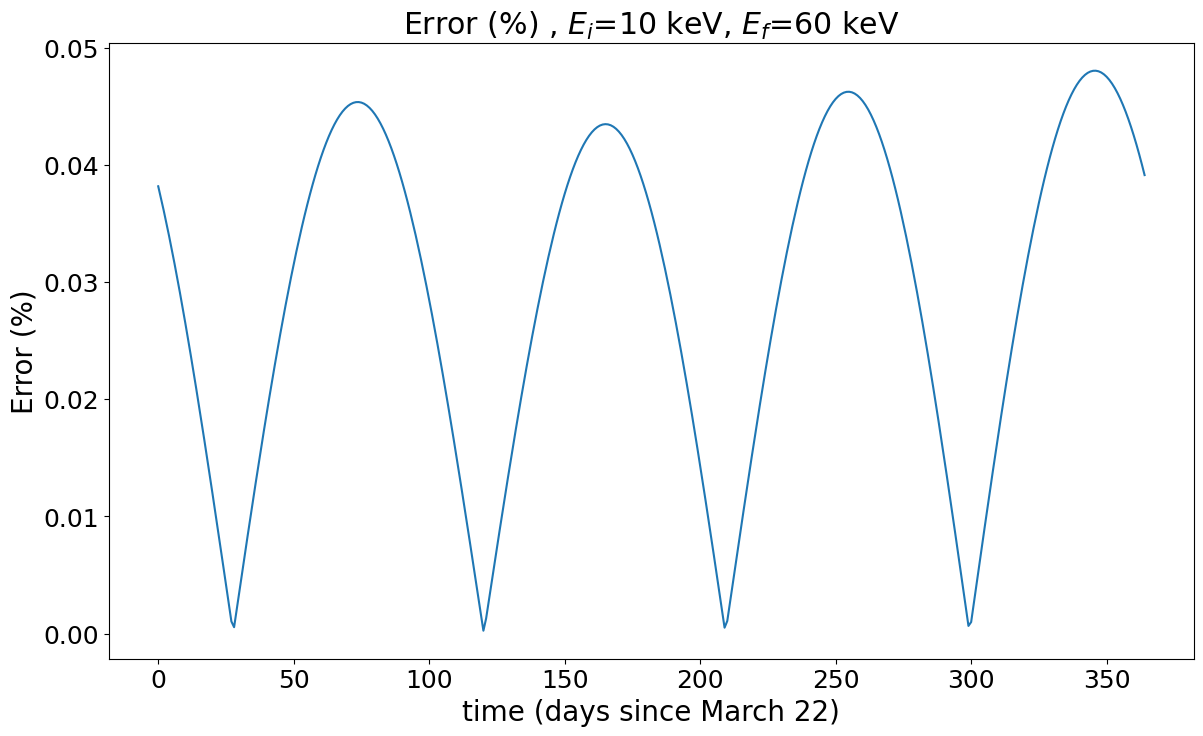

In [30]:
Ei=10
Ef=60

mW=70
si=1e-41 #seccion eficaz SI(cm^-2)
ritmosvstiempos=ratevsTimeNaI(Ei,Ef,mW,si)
R_max=np.max(ritmosvstiempos)
print('R_max = '+str(np.round(R_max)))
R_min=np.min(ritmosvstiempos)
print('R_min = '+str(np.round(R_min)))
R_0=np.mean(ritmosvstiempos)
print('R_0 = '+str(np.round(R_0)))
t_max=np.argmax(ritmosvstiempos)
print('t_max = '+str(t_max))

R_mod=0.5*(R_max-R_min)
omega=2*np.pi/365.

dias = np.arange(0,365)

rapprox=([(R_0+R_mod*np.cos(omega*(t-t_max))) for t in dias])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(dias,ritmosvstiempos, label = "$R_{num}$")
ax.plot(dias,rapprox, label = "$R_{approx}$")
ax.set_title('Ritmo total , $E_i$='+str(Ei)+' keV, $E_f$='+str(Ef)+' keV')
ax.set_ylabel('rate (c/kg/y)',fontsize=20)
ax.set_xlabel('time (days since March 22)',fontsize=20)
ax.legend()


err=([np.abs(((1-rapprox[t]/ritmosvstiempos[t]))*100) for t in dias])
print('Error = '+str(np.round(err[t_max],5)))

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(dias,err, label = "$R_{num}$")
ax.set_title('Error (%) , $E_i$='+str(Ei)+' keV, $E_f$='+str(Ef)+' keV')
ax.set_ylabel('Error (%)',fontsize=20)
ax.set_xlabel('time (days since March 22)',fontsize=20)
#ax.set_yscale("log")



En esta gráfica representamos el ritmo en función de la mas del wimp, dada una seccion eficaz concreta

Text(0.5, 0, '$m_w$ (GeV)')

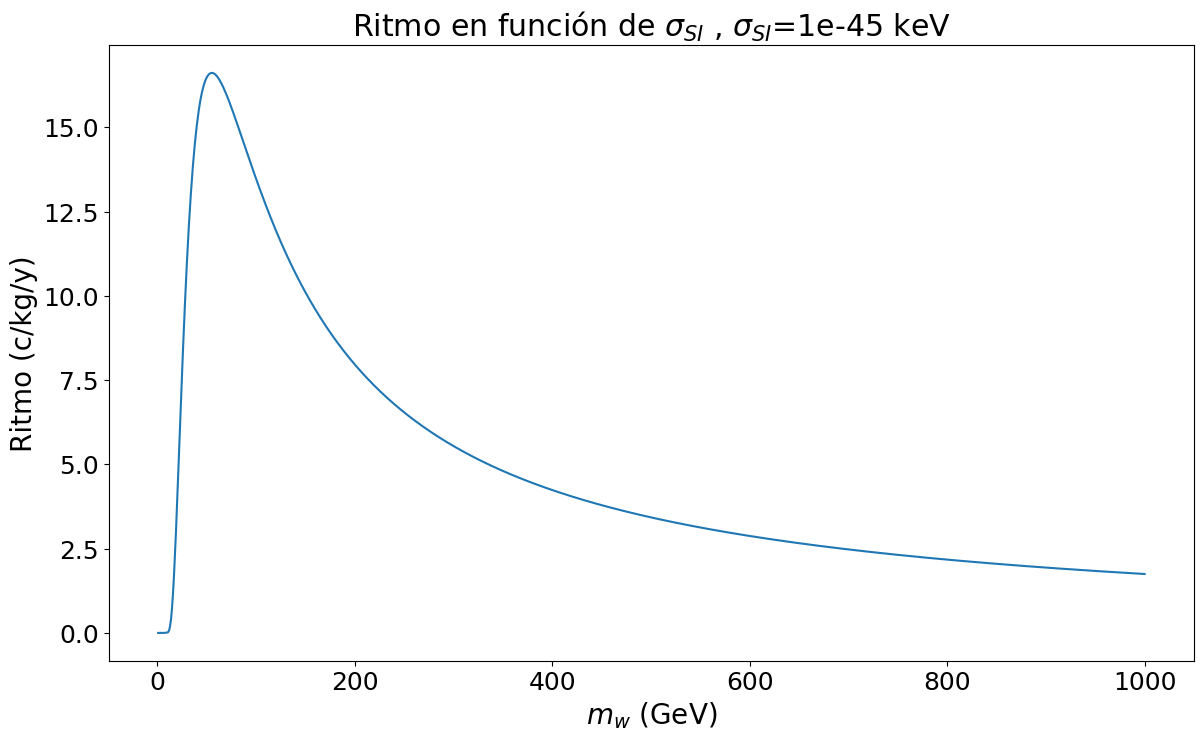

In [32]:
#Calculamos función Ritmo vs Masa Wimp

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

sigma_si=1e-45

mWs= np.linspace(1,1000,1000)

R=np.array([totalRateNaI(10,60,timeAvg,m,sigma_si) for m in mWs])


plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(mWs,R, label = "$R_{num}$")
ax.set_title(r'Ritmo en función de $\sigma_{SI}$ , $\sigma_{SI}$='+str(sigma_si)+' keV')
ax.set_ylabel(r'Ritmo (c/kg/y)',fontsize=20)
ax.set_xlabel('$m_w$ (GeV)',fontsize=20)
#ax.set_yscale("log")
